In [1]:
from cp_orth import orth_als
import pandas as pd
import pickle

import matplotlib.pyplot as plt
%pylab inline
matplotlib.rcParams.update({'font.size': 14})


import logging
logging.basicConfig(level=logging.INFO,
        format='%(levelname)-8s [%(lineno)d] %(message)s')

Populating the interactive namespace from numpy and matplotlib


In [21]:
max_n_iterations = 200

In [22]:
tuples = []
for stop_orth in range(0, max_n_iterations, int(max_n_iterations/10)):
    cutoff = 10000
    rank = 8
    filen = '/mnt/permanent/home/makrai/project/verb-tensor/verb/tensor/0/sparstensr_log_freq_{}.pkl'.format(cutoff)
    stensor, index = pickle.load(open(filen, mode='rb'))
    ktensor, fit, n_iterations, exectimes = orth_als(stensor, rank, stop_orth=stop_orth)
    tuple_ = (cutoff, rank, stop_orth, ktensor.shape, fit, n_iterations, sum(exectimes))
    tuples.append(tuple_)
    logging.info(tuple_)

INFO     [152] 
INFO     [154] 
INFO     [10] (10000, 8, 0, (128, 171, 290), 0.412510715239518, 104, 2.851867000000084)
INFO     [152] 
INFO     [154] 
INFO     [10] (10000, 8, 20, (128, 171, 290), 0.41213687884862005, 153, 4.184414999999717)
INFO     [152] 
INFO     [154] 
INFO     [10] (10000, 8, 40, (128, 171, 290), 0.38359860864566375, 14, 0.44360100000005787)
INFO     [152] 
INFO     [154] 
INFO     [10] (10000, 8, 60, (128, 171, 290), 0.4122270070780386, 239, 6.522519000000102)
INFO     [152] 
INFO     [154] 
INFO     [10] (10000, 8, 80, (128, 171, 290), 0.4121697933619225, 239, 6.634933000000274)
INFO     [152] 
INFO     [154] 
INFO     [10] (10000, 8, 100, (128, 171, 290), 0.3846831026461641, 93, 2.7145559999991065)
INFO     [152] 
INFO     [154] 
INFO     [10] (10000, 8, 120, (128, 171, 290), 0.41321787210018646, 319, 8.921577999999954)
INFO     [152] 
INFO     [154] 
INFO     [10] (10000, 8, 140, (128, 171, 290), 0.3823130778473802, 6, 0.20522299999993265)
INFO     [152] 
INF

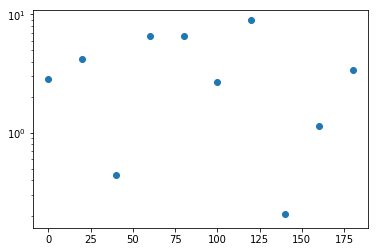

In [23]:
df = pd.DataFrame(tuples, columns=['cutoff', 'rank_', 'stop_orth', 'shape', 'fit', 'n_iterations', 'time'])
plt.scatter(df.stop_orth, df.time)
plt.yscale('log')

|cutoff|rank|best n orth|n_iter|
|------|----|-----------|------|
|  100K|   8|          1|
|   10K|   2|          1|
|   10K|   4|    30--80+|
|   10K|   8|          0|
|   10K|  16|         39|
